<p style="text-align:center;background-color: grey "> 
    <span style="font-size:40px; color:black; font-family:'Times New Roman', serif; font-weight:bold;">
        Task 1 - House Price Prediction<br>
        TechnoHacks Internship<br><br>
    </span> 
    <span style="font-size:30px; color:black; font-family:'Times New Roman', serif; font-weight:bold;">
        Author - Anuj Nanda Gorkhali
    </span>
</p>

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

# import dataset

In [2]:
data = pd.read_csv('kc_house_data.csv')
df = pd.DataFrame(data)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Data Inspection

Feature matrix: 
- waterfront: 1 = yes, 0 = no
- view: scored from 0,1,2,3,4
- condition: scored from 1-5
- grade: scorded 1-13

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Data Cleaning

In [6]:
df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Date is in odject type, So here I am changing type to datetime

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['date'] = df['date'].dt.strftime('%Y-%m')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date',ascending=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 7984 to 10371
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2

<Axes: xlabel='yr_renovated'>

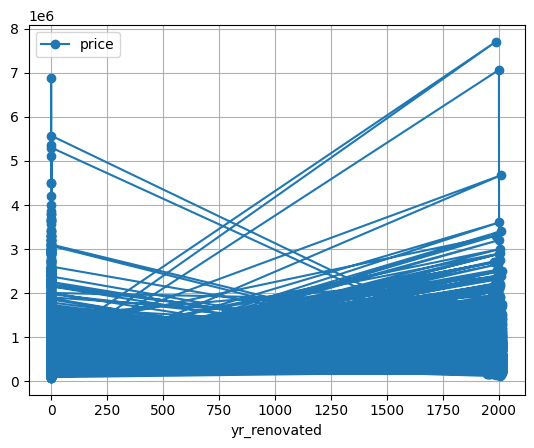

In [9]:
df.plot(kind='line', x='yr_renovated', y='price', marker='o', grid = True)

The houses that are not renovated are labelled as 0 which is misinformative. 
Here I am modifying this feature to be the year the house was last modified; 
Houses that were not renovated will just be their build year.

In [10]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
df = df.rename(columns={'yr_renovated': 'last_modification_year'})

<Axes: xlabel='last_modification_year'>

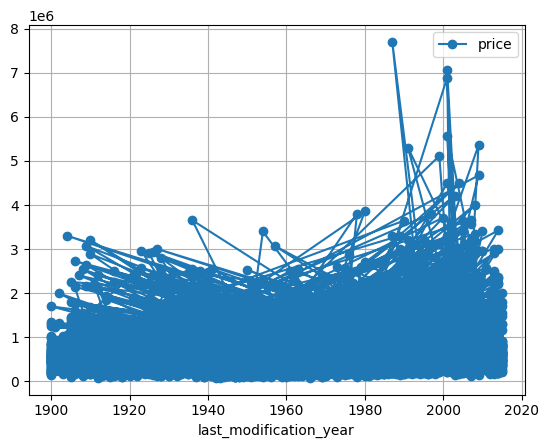

In [11]:
df.plot(kind='line', x='last_modification_year', y='price', marker='o', grid= True)

In [12]:
df['age'] = df['date'].dt.year - df['yr_built']

In [13]:
df = df.drop(columns=["sqft_living15","sqft_lot15","zipcode",])

# Visualization and Feature Selection

<Axes: xlabel='date', ylabel='Price'>

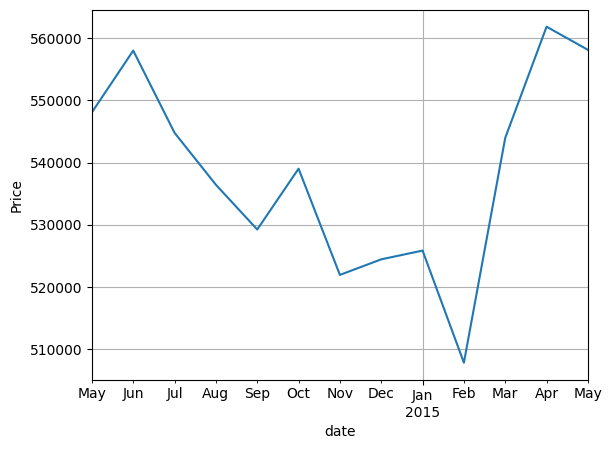

In [14]:
monthly_avg_price = df.groupby(df['date'].dt.to_period('M'))['price'].mean()
monthly_avg_price.plot(kind='line', grid=True, ylabel='Price')


In [15]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
            'grade', 'sqft_above', 'sqft_basement', 'age', 'last_modification_year', 'lat', 'long']

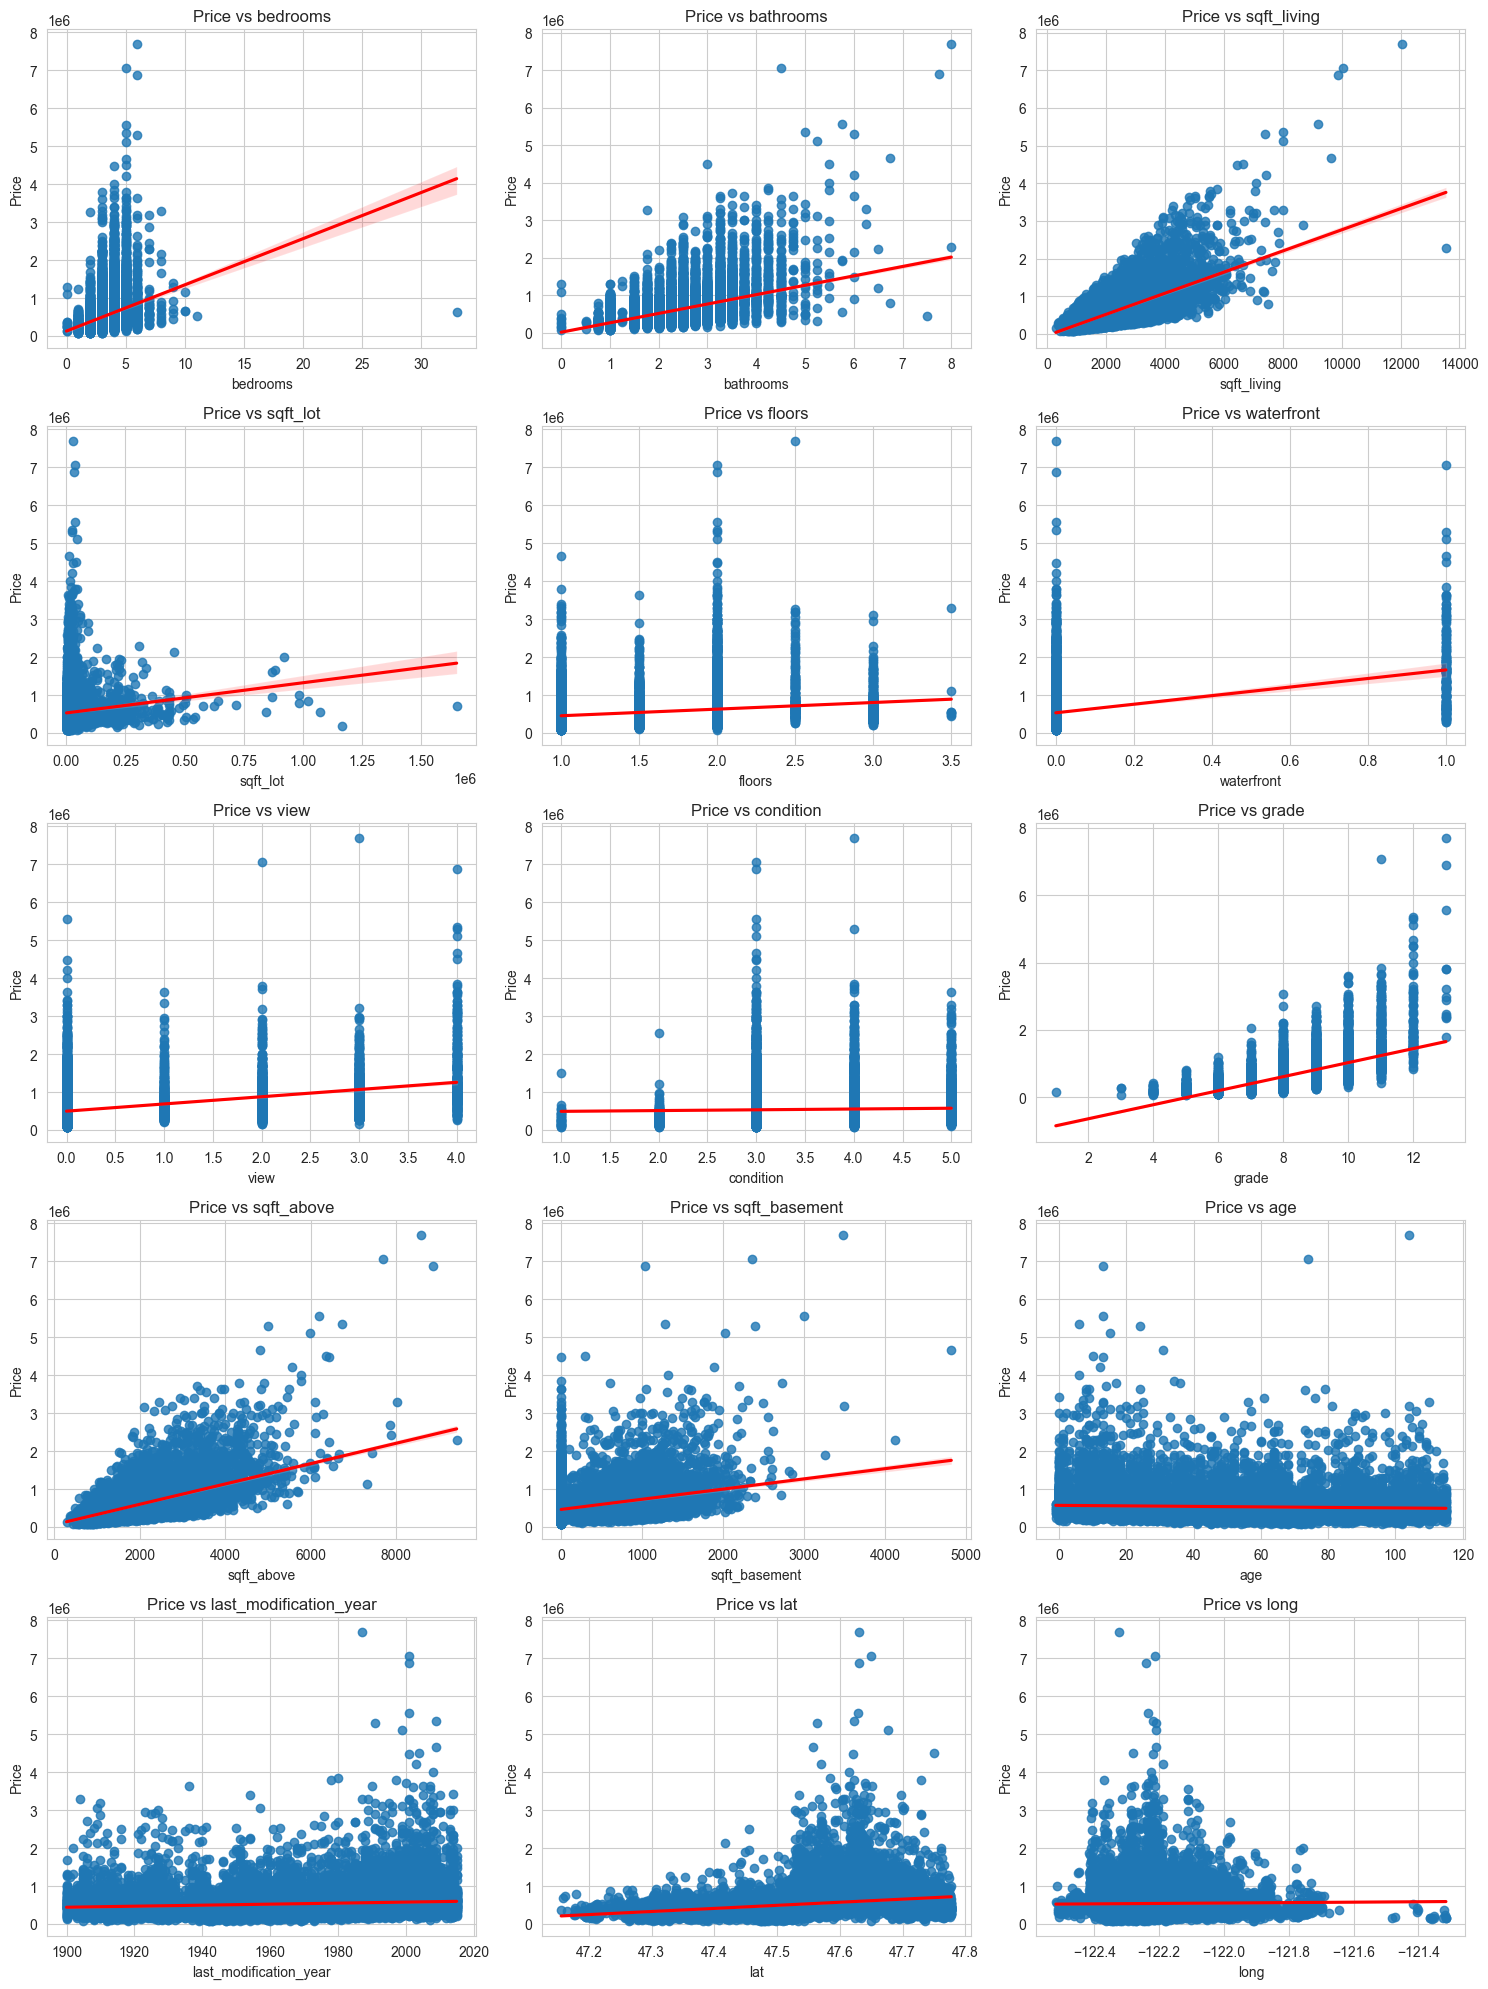

In [16]:
# Set the visual style of the plots
sns.set_style("whitegrid")

n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    sns.regplot(x=feature, y='price', data=df, ax=axes[row, col], line_kws={'color': 'red'})
    
    axes[row, col].set_title(f'Price vs {feature}', fontsize=12)
    axes[row, col].set_xlabel(feature, fontsize=10)
    axes[row, col].set_ylabel('Price', fontsize=10)

for i in range(len(features), n_rows * n_cols):
    axes.flat[i].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\anujg\AppData\Local\Temp\ipykernel_11904\2403293227.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmap = df.corr()


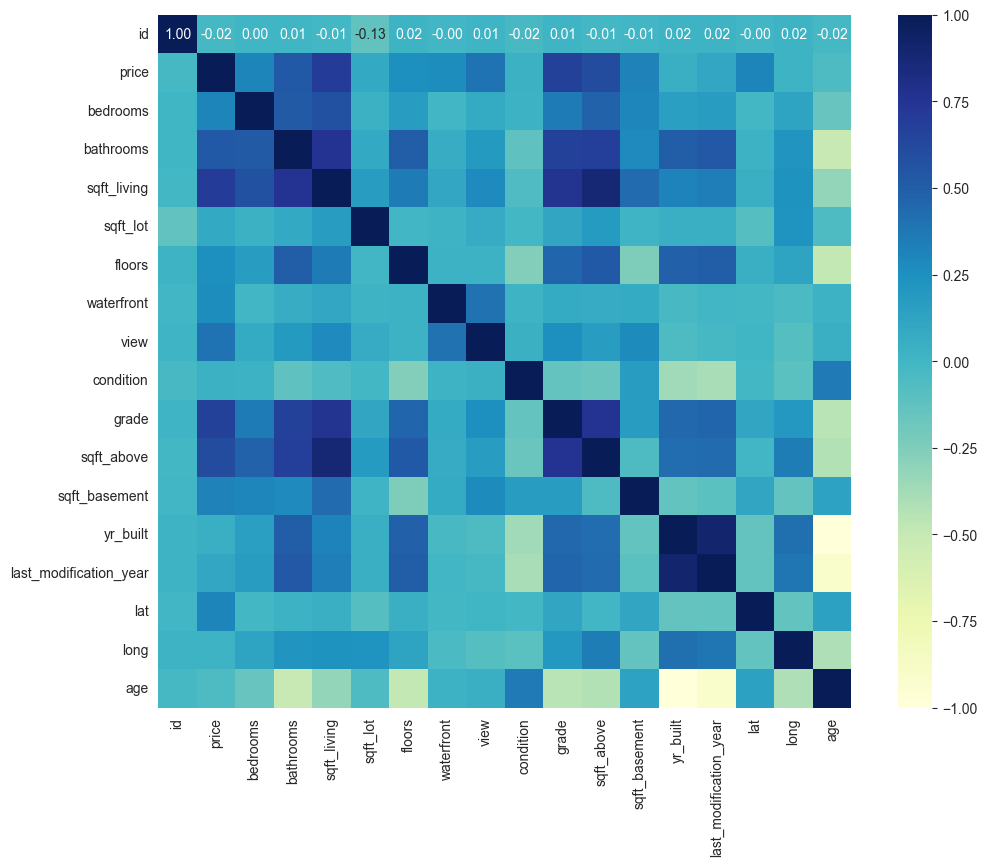

In [17]:
corrmap = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap,vmin=-1, vmax=1, square=True, cmap="YlGnBu", annot = True, fmt='.2f', ax=ax)
plt.show()

C:\Users\anujg\AppData\Local\Temp\ipykernel_11904\887254504.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


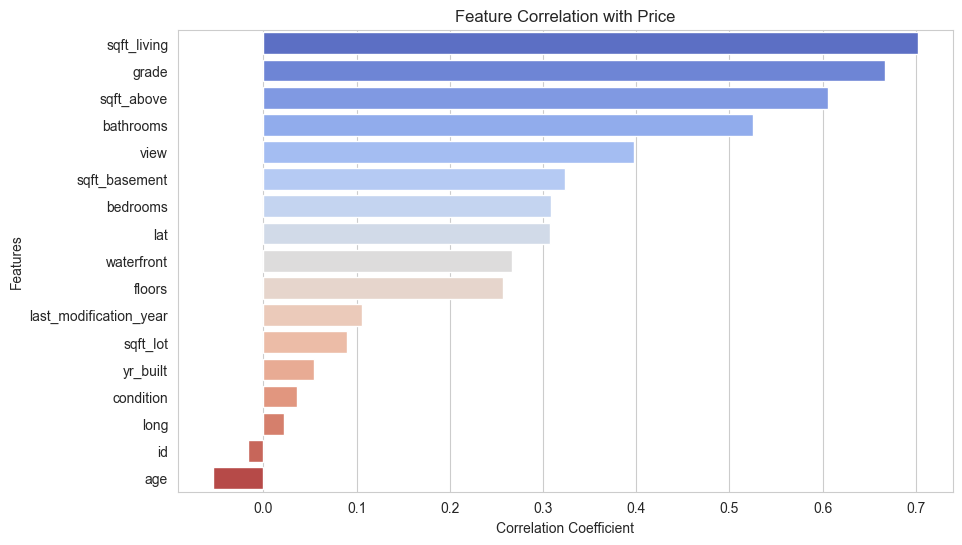

In [18]:
# Assuming df is your DataFrame, and 'price' is your target variable
correlation_matrix = df.corr()

# Extracting the correlations of each feature with the target variable
target_correlations = correlation_matrix['price'].drop('price')  # Drop self-correlation
target_correlations = target_correlations.sort_values(ascending=False)  # Sort in descending order

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.values, y=target_correlations.index, palette="coolwarm")
plt.title('Feature Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Predictive Models

In [19]:
features = ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 
            'waterfront', 'floors', 'last_modification_year', 'sqft_lot', 'age', 'condition', 'long']

In [20]:
X = df[features]
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=46)

In [21]:
model_LR = LinearRegression()

model_LR.fit(X_train, y_train)


y_pred = model_LR.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Coefficient of Determination (R^2): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Coefficient of Determination (R^2): 0.70
Mean Squared Error (MSE): 39864115552.95
Root Mean Squared Error (RMSE): 199660.00


In [22]:
# Performing 5-fold cross-validation
cv_scores = cross_val_score(model_LR, X, y.values.ravel(), cv=5)

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.69 (+/- 0.02)


# Creating and fitting the Lasso Regression model

In [23]:
lasso_model = Lasso(alpha=1.0)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
print(f"Root Mean Squared Error (RMSE) for Lasso Regression: {rmse_lasso:.2f}")

Root Mean Squared Error (RMSE) for Lasso Regression: 199661.17


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.276e+13, tolerance: 2.046e+11
  model = cd_fast.enet_coordinate_descent(
